# Clinopyroxene-only and Clinopyroxene-Liquid Thermobarometry.
- This notebook goes through the options for clinopyroxene-Liquid thermobarometry and clinopyroxene-only thermobarometry
- Cpx-Liq matching is not covered in this tutorial, there is a separate folder "Cpx_Liquid_melt_matching" for that 
- You can download the excel spreadsheet from:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Cpx_Cpx_Liq_Thermobarometry/Cpx_Liq_Example.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## First, load the necessary python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Now, load the data 

In [3]:
out=pt.import_excel('Cpx_Liq_Example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

## Getting help
- At any point, you can do help(pt.function) to get some more information
- For example, here we get information on inputs/outputs for Cpx-Liq thermometry, including the equation options

In [4]:
help(pt.calculate_cpx_liq_temp)

Help on function calculate_cpx_liq_temp in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_temp(*, equationT, cpx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, H2O_Liq=None, Fe3Fet_Liq=None, sigma=1, Kd_Err=0.03)
    Clinopyroxene-Liquid thermometry, calculates temperature in Kelvin
    (and equilibrium tests as an option)
    
    Parameters
    -------
    cpx_comps: pandas.DataFrame
        Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
    liq_comps: pandas.DataFrame
        Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
    Or:
    
    meltmatch: pandas.DataFrame
        Combined dataframe of cpx-Liquid compositions
        Used for calculate_cpx_liq_press_temp_matching function.
    
    EquationT: str
        Choice of equation:
        Cpx-Liquid
        |  T_Put1996_eqT1  (P-indep, H2O-indep)
        |  T_Mas2013_eqTalk1  (P-indep, H2O-indep, alk adaption of T1)
        |  T_Brug2019  

## Example 1 - Calculating Temperature


### 1a - Temperature for a known pressure and water content
- Here, we calculate temperature using the H2O content given in the H2O_Liq column in the user-entered spreadsheet (the default), and P=5 kbar
- There are a number of equations (see help above), but here we use T_Put2008_eq33 for temperature

In [5]:
Temp_T33=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
                        equationT="T_Put2008_eq33", P=5)-273.15 # Default Kelvin
Temp_T33

0    1091.562867
1    1031.605285
2     999.303442
3    1032.536881
4     979.726983
dtype: float64

### 1b - Temperature, overwriting the spreadsheet water content in the function itself
- Here, we are reseting water to 0 wt%. You can see the temperatures are much higher

In [6]:
Temp_T33_0H2O=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                        equationT="T_Put2008_eq33",
                                        P=5, H2O_Liq=0)-273.15
Temp_T33_0H2O

0    1142.969951
1    1109.923744
2    1073.681511
3    1110.970579
4    1051.769286
dtype: float64

### 1c- Lets use the thermometer of Brugman and Till, 2019. 
- This returns a number of warnings, because the authors recomend a compositional calibration range, which our entered cpx compositions lie outside of.

In [7]:
Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                    equationT="T_Brug2019", P=5)-273.15
Temp_TBrug

Youve selected a P-independent function


C:\Users\penny\AppData\Local\Temp\ipykernel_4796\1899851194.py:1: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
C:\Users\penny\AppData\Local\Temp\ipykernel_4796\1899851194.py:1: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
C:\Users\penny\AppData\Local\Temp\ipykernel_4796\1899851194.py:1: UserWarning: Some inputted Liq compositions have  SiO2<70 wt%;
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:1165: UserWarning: which is outside the recomended calibration range of Brugman and Till (2019)
  w.warn("which is outside the recomended calibration range of Brugman and Till (2019)")


0    1797.689417
1    1632.682392
2    1202.363348
3    1558.356437
4    1028.947694
dtype: float64

### 1d - We can also specify eq_tests=True to get a full dataframe back with all the components, as well as a number of equilibrium test values
- You could then extract just the temps using Temp_T33_0H2O_EqTests['T_K_calc'] or any other column you want the same way

In [9]:
Temp_T33_0H2O_EqTests=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                                equationT="T_Put2008_eq33", 
                                                P=5, H2O_Liq=0, eq_tests=True)
Temp_T33_0H2O_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,5,1416.119951,False,0.042816,0.094027,0.010858,0.021183,0.016957,0.089424,0.001586,...,-0.010858,0.013418,-0.016957,0.0,0.009562,0.043320,0.002307,0.016184,0.000872,0.000872
1,5,1383.073744,False,0.036792,0.090778,0.007575,0.021866,0.023796,0.104285,0.024207,...,-0.007575,0.013021,-0.023796,0.0,0.004122,0.056932,0.011994,0.017429,0.000099,0.000099
2,5,1346.831511,False,0.058659,0.172858,0.043395,0.013382,0.075254,0.006413,0.103915,...,0.043395,0.016630,-0.075254,0.0,0.003245,0.029418,0.042249,0.018331,0.000246,0.000246
3,5,1384.120579,False,0.034331,0.101144,0.012488,0.028698,0.031526,0.084045,0.024697,...,-0.012488,0.014301,-0.031526,0.0,0.003909,0.050962,0.009764,0.019332,0.002997,0.002997
4,5,1324.919286,False,0.022156,0.097447,0.021106,0.049019,0.032121,0.071950,0.035481,...,-0.021106,0.010990,-0.032121,0.0,0.001315,0.050713,0.014761,0.027953,0.005738,0.005738


## Example 2 - Calculating pressure for a known temperature

### 2a - Pressure at fixed temperature (T=1300 K), and pressures from Neave and Putirka (2017) 

In [11]:
P_FixedTNeave=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, 
                                       equationP="P_Neave2017", T=1300)
P_FixedTNeave

0    0.634602
1    1.655874
2    1.146083
3    1.028349
4    3.854147
dtype: float64

### 2b - Equation 30 from Putirka (2008), overwriting input water, return equilibrium tests
- Here we change equation P, overwrite the H2O content in the function, and ask for equilibrium tests.
- We are selecting equation 30 from Putirka (2008) this time, T=1300 K

In [12]:
Temp_P30_0H2O=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, 
                                         equationP="P_Put2008_eq30",
                                         T=1300, H2O_Liq=0, eq_tests=True)
Temp_P30_0H2O

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,-2.090909,1300,False,0.015390,0.116829,0.002696,0.003912,0.019173,0.089851,0.350659,...,-0.002696,0.011202,-0.019173,0.0,0.009562,0.047180,0.006167,0.016165,0.000891,0.000891
1,-2.604072,1300,True,0.016996,0.108121,0.006605,0.005373,0.025431,0.049622,0.286210,...,0.006605,0.011385,-0.025431,0.0,0.004122,0.060657,0.015718,0.017407,0.000077,0.000077
2,-2.145841,1300,False,0.069927,0.183575,0.074576,0.029940,0.076260,0.125978,0.249574,...,0.074576,0.015625,-0.076260,0.0,0.003245,0.030292,0.041375,0.018308,0.000223,0.000223
3,-2.334004,1300,False,0.014291,0.117657,0.003134,0.008701,0.033245,0.066274,0.281808,...,0.003134,0.012582,-0.033245,0.0,0.003909,0.054136,0.012939,0.019308,0.002973,0.002973
4,-0.177987,1300,False,0.016126,0.102892,0.007476,0.045035,0.032562,0.004383,0.113023,...,-0.007476,0.010549,-0.032562,0.0,0.001315,0.051697,0.015744,0.027927,0.005712,0.005712


### 2c - As above, but setting a fixed Fe3Fet_Liq ratio
- Can overwrite the Fe3Fet in the input spreadsheet to a different value, affects calculations of delta Kd as this uses just Fe2+ in the melt
- Note, it is debated whether Kd Fe-Mg should be calculated with all Fe (to do that here, specify Fe3Fet_Liq=0, Putirka), or using just Fe2+ (e.g., Neave and Putirka, 2017)
- you can compare the delta Kd Put 2008 in this option from the answers above. You can see, by adding 30% Fe3+, you have become further from equilibrium

In [13]:
Temp_P30_0H2O_30Fe=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, 
                    liq_comps=Liqs, equationP="P_Put2008_eq30", 
                    T=1300, H2O_Liq=0, Fe3Fet_Liq=0.3, eq_tests=True)
Temp_P30_0H2O_30Fe

,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,-2.090909,1300,False,0.080646,0.212865,0.002696,0.003912,0.019173,0.089851,0.350659,...,-0.002696,0.011202,-0.019173,0.0,0.009562,0.047180,0.006167,0.016165,0.000891,0.000891
1,-2.604072,1300,False,0.078351,0.203468,0.006605,0.005373,0.025431,0.049622,0.286210,...,0.006605,0.011385,-0.025431,0.0,0.004122,0.060657,0.015718,0.017407,0.000077,0.000077
2,-2.145841,1300,False,0.202528,0.316176,0.074576,0.029940,0.076260,0.125978,0.249574,...,0.074576,0.015625,-0.076260,0.0,0.003245,0.030292,0.041375,0.018308,0.000223,0.000223
3,-2.334004,1300,False,0.082216,0.214165,0.003134,0.008701,0.033245,0.066274,0.281808,...,0.003134,0.012582,-0.033245,0.0,0.003909,0.054136,0.012939,0.019308,0.002973,0.002973
4,-0.177987,1300,False,0.079595,0.198613,0.007476,0.045035,0.032562,0.004383,0.113023,...,-0.007476,0.010549,-0.032562,0.0,0.001315,0.051697,0.015744,0.027927,0.005712,0.005712


## Example 3 - Iterating pressure and temperature
- In reality, unlesa you are an experimentalist, you rarely know one of pressure or temperature
- In Keith Putirka's spreadsheets, you can link up columns to iterate P and T towards a solution, this can be done here using the function calculate_cpx_liq_press_temp...

### 3a - Iterating equation 30 from Putirka (2008) for P, and equation 33 from Putirka (2008) for T
- Without specifying anything else, you get a dataframe with columns for calculated pressure and temperature

In [14]:
PT_iter_30_31=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs,
                                              equationP="P_Put2008_eq30", 
                                              equationT="T_Put2008_eq33")
PT_iter_30_31

,P_kbar_calc,T_K_calc
0,2.530914,1352.408784
1,1.786845,1290.151507
2,1.171520,1255.933868
3,2.143416,1292.669093
4,2.763538,1243.469600


### 3b - Same as above, but with eq_tests=True
- Get all equilibrium tests, and input compostions as a larger dataframe.

In [15]:
PT_iter_30_31_EqTests=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", 
                                                      equationT="T_Put2008_eq33", eq_tests=True)
PT_iter_30_31_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,2.530914,1352.408784,True,0.027981,0.106599,0.011304,0.009468,0.018174,0.014780,0.160622,...,-0.011304,0.012201,-0.018174,0.0,0.009562,0.045314,0.004301,0.016178,0.000878,0.000878
1,1.786845,1290.151507,True,0.014591,0.110154,0.009917,0.002832,0.025619,0.009195,0.327542,...,-0.009917,0.011198,-0.025619,0.0,0.004122,0.061147,0.016209,0.017420,0.000090,0.000090
2,1.171520,1255.933868,False,0.080784,0.193537,0.046615,0.050574,0.077199,0.134845,0.434655,...,0.046615,0.014686,-0.077199,0.0,0.003245,0.031201,0.040466,0.018319,0.000234,0.000234
3,2.143416,1292.669093,False,0.012502,0.119081,0.015465,0.006444,0.033388,0.022622,0.311452,...,-0.015465,0.012439,-0.033388,0.0,0.003909,0.054443,0.013245,0.019323,0.002988,0.002988
4,2.763538,1243.469600,False,0.002154,0.115101,0.025085,0.033393,0.033542,0.029538,0.345537,...,-0.025085,0.009568,-0.033542,0.0,0.001315,0.054153,0.018201,0.027943,0.005728,0.005728


## Example 3 - Cpx-only Barometry
- Very similar to above, just don't need liq_comps input

### 3a -Pressure only, using equation 32b (at T=1300 K), and H2O=0
- This equation requires H2O content in the liquid. If you don't enter anything, it assumes H2O=0
- else specify using H2O_Liq=....
- it prints a warning telling you that by defualt, this is what the function is doing

In [16]:
eq32b_noH=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b")
eq32b_noH

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:2051: UserWarning: This Cpx-only barometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only barometer is sensitive to H2O content of the liquid. '


0   -1.567381
1   -1.202221
2   -0.317946
3   -0.996608
4    0.467437
dtype: float64

### 3b -  Pressure only, using 5 wt% water

In [17]:
eq32b_5H=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_5H

0    0.697619
1    1.062779
2    1.947054
3    1.268392
4    2.732437
dtype: float64

### 3c - Temperature-only using eq 32d at 5 kbar

In [19]:
eq32d_5kbar=pt.calculate_cpx_only_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
         P=5)
eq32d_5kbar

0    1457.849197
1    1441.107847
2    1415.899813
3    1455.722443
4    1441.512524
dtype: float64

### 3d - Iterating P from 32b, and T from 32d, with H2O=5

In [20]:
eq32b_32d_5H=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_32d_5H

,P_kbar_calc,T_K_calc,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,3.889323,1448.656494,51.5,0.50,3.70,5.18,0.09,15.8,22.8,0.24,0,0.66,0
1,3.721484,1430.647515,50.3,0.73,4.12,5.83,0.00,15.0,22.7,0.24,0,0.28,1
2,3.982623,1407.721620,47.3,1.75,7.85,6.51,0.14,13.1,22.5,0.25,0,0.22,2
3,4.567865,1452.151021,51.1,0.63,4.41,5.66,0.13,15.6,22.6,0.23,0,0.27,3
4,5.941303,1449.216073,51.0,0.56,4.14,7.33,0.20,14.4,22.4,0.31,0,0.09,4


## Example 4 - Plotting a Cpx-Liq Rhodes diagram to assess Fe-Mg equilibrium using fixed Kd values
- The function calculate_cpx_rhodes_diagram_lines calculates the lines needed for the plot in a number of ways 
- There is disagrement in the literature as to whether Kd Fe-Mg should be assessed using just Fe2+ in the melt, or FeT, so we show both scenarios here. 

### Step 1 - Calculate Mg# for liq and cpxs
- A number of functions in thermobar let you do it, we use this one here because it returns Mg#s for both phases

In [22]:
cpx_comps_Fe3=pt.calculate_clinopyroxene_liquid_components(liq_comps=Liqs, 
                cpx_comps=Cpxs, Fe3Fet_Liq=0.2)

- Mgnos of Cpx are stored in the column accesed by cpx_comps_Fe3['Mgno_Cpx']
- Mgnos of Liq are stored in the column accesed by  cpx_comps_Fe3['Mgno_Liq_noFe3'], for no Fe3,
 or cpx_comps_Fe3['Mgno_Liq_Fe2'] using just Fe2+ (e.g., 20% of Fe is 3+ here)

### Step 2 - Calculate equilibrium lines to show on the rhodes diagram
- You tell the function the min and max glass Mg# you want to show, e.g., the xspan of your plot
- It returns lines for Kd=0.28+-0.08 after Putirka (2008)

In [23]:
# Want to calculate Mg# to show on diagram between say 0.4 and 0.7 for the glass
eq_lines_1=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7)
eq_lines_1

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36)
0,0.400000,0.704225,0.769231,0.649351
1,0.403030,0.706845,0.771462,0.652217
2,0.406061,0.709445,0.773672,0.655065
3,0.409091,0.712025,0.775862,0.657895
4,0.412121,0.714586,0.778032,0.660707
...,...,...,...,...
95,0.687879,0.887273,0.916801,0.859588
96,0.690909,0.888681,0.917874,0.861287
97,0.693939,0.890081,0.918941,0.862979
98,0.696970,0.891473,0.920000,0.864662


### Step 3 - Combine these on a plot
- You might need to adust the x and y limits of this plot for your own data

(0.6, 0.95)

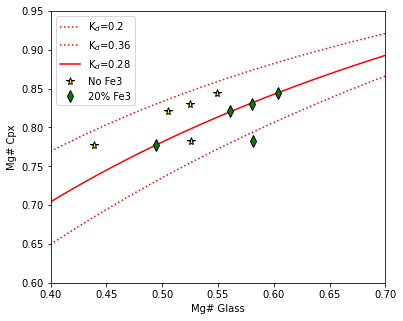

In [25]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.2)'], ':r', label="K$_d$=0.2")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.36)'], ':r', label="K$_d$=0.36")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.28)'], '-r', label="K$_d$=0.28")

ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')
# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

## Example 5 - Rhodes diagram using equation 35 of Putirka to calculate Kd as a function of T.
- Here, we plot the equilibrium fields on the Rhodes diagram using equation 35 of Putirka, which is T-sensitive
- Must specify T in Kelvin. Then return column for default 0.28, as well as the results for Putirka eq 35.

In [26]:
eq_lines_2=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300)
eq_lines_2.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673


(0.6, 0.95)

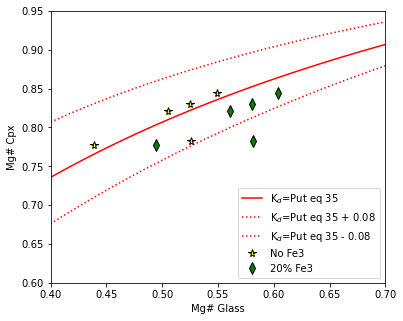

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Kd from Eq 35 P2008)'], '-r', label="K$_d$=Put eq 35")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)+0.08'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)-0.08'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

##  Example 6 - You can also specify a minimum and maximum Kd value you wish to calculate Rhodes lines for (here 0.2, 0.3)

In [28]:
eq_lines_3=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, KdMin=0.2, KdMax=0.3)
eq_lines_3.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.778032,0.700309


(0.6, 0.95)

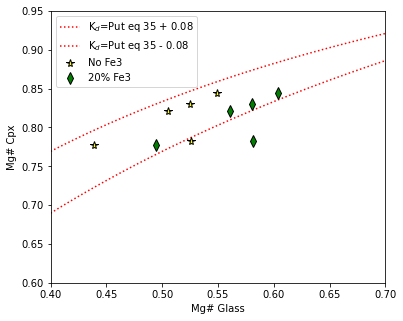

In [29]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMin=0.2)'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMax=0.3)'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

## Example 7 - Can get all options by specifying a temp, and a min and max Kd
- Can then plot them however you want. 

In [30]:
eq_lines_4=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300, KdMin=0.2, KdMax=0.3)
eq_lines_4.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08,Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673,0.778032,0.700309
